<h3>Forecasting</h3>

This is a regression task to predicate a target, Sales.  The data for this task is referred to as a time series data.  The data uses daily, monthly, and yearly sales data from 2019-2022; and has 19 columns to include different features such as, but not limited to, region, category, product name, and profit.  This task is to use current/historical data at a date to predict next day's sales.  

<h4>Import and Visualizing Data</h4>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sale = pd.read_excel('Superstore.xlsx')
sale.head()

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Profit,Quantity,Sales
0,Furniture,Henderson,United States,Claire Gute,Bush,2021-11-08,CA-2021-152156,42420.0,Bush Somerset Collection Bookcase,South,Consumer,2021-11-11,Second Class,Kentucky,Bookcases,0.00,42,2,262
1,Furniture,Henderson,United States,Claire Gute,Hon,2021-11-08,CA-2021-152156,42420.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,Consumer,2021-11-11,Second Class,Kentucky,Chairs,0.00,220,3,732
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,Universal,2021-06-12,CA-2021-138688,90036.0,Self-Adhesive Address Labels for Typewriters b...,West,Corporate,2021-06-16,Second Class,California,Labels,0.00,7,2,15
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,Bretford,2020-10-11,US-2020-108966,33311.0,Bretford CR4500 Series Slim Rectangular Table,South,Consumer,2020-10-18,Standard Class,Florida,Tables,0.45,-383,5,958
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,Eldon,2020-10-11,US-2020-108966,33311.0,Eldon Fold 'N Roll Cart System,South,Consumer,2020-10-18,Standard Class,Florida,Storage,0.20,3,2,22


In [3]:
print(sale.shape)

(9994, 19)


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        9994 non-null   object        
 1   City            9994 non-null   object        
 2   Country/Region  9994 non-null   object        
 3   Customer Name   9994 non-null   object        
 4   Manufacturer    9994 non-null   object        
 5   Order Date      9994 non-null   datetime64[ns]
 6   Order ID        9994 non-null   object        
 7   Postal Code     9983 non-null   float64       
 8   Product Name    9994 non-null   object        
 9   Region          9994 non-null   object        
 10  Segment         9994 non-null   object        
 11  Ship Date       9994 non-null   datetime64[ns]
 12  Ship Mode       9994 non-null   object        
 13  State           9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Disc

In [5]:
#Computes a summary of statistics pertaining to the DataFrame columns.
sale.describe()

,Postal Code,Discount,Profit,Quantity,Sales
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,0.156203,28.651891,3.789574,229.873324
std,32038.715955,0.206452,234.255712,2.225110,623.248946
min,1040.000000,0.000000,-6600.000000,1.000000,0.000000
25%,23223.000000,0.000000,2.000000,2.000000,17.000000
50%,57103.000000,0.200000,9.000000,3.000000,54.500000
75%,90008.000000,0.200000,29.000000,5.000000,210.000000
max,99301.000000,0.800000,8400.000000,14.000000,22638.000000


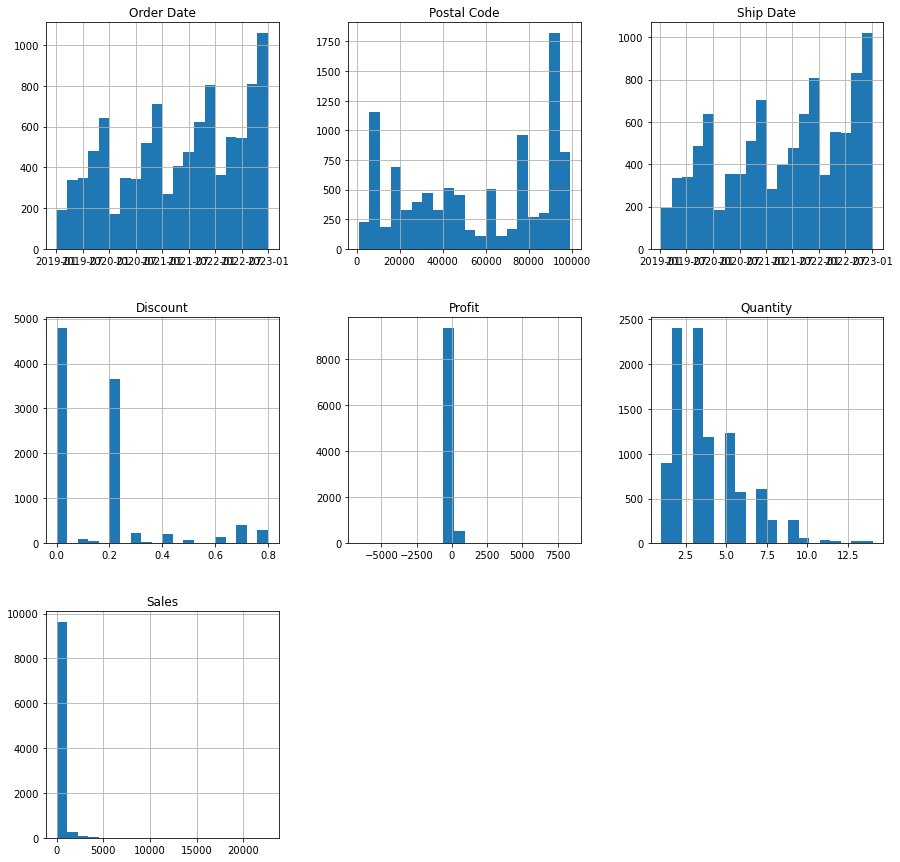

In [6]:
#Analyzing the data using graphs and simple statistics of each column.
from matplotlib import pyplot as plt

sale.hist(bins=20, figsize=(15,15))
plt.show()

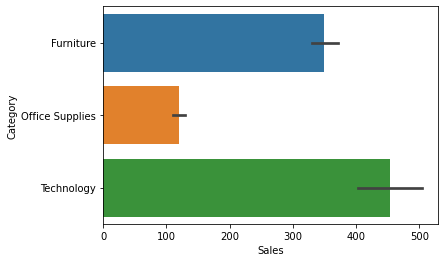

In [7]:
ax = sns.barplot(x="Sales", y="Category", data=sale)

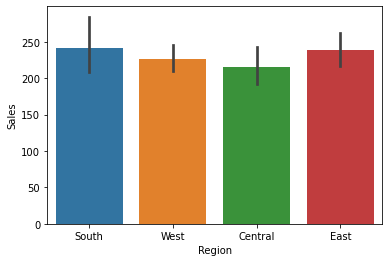

In [8]:
ax = sns.barplot(x="Region", y="Sales", data=sale)

In [9]:
# Change data of Order Date and Ship Date to a date time format
sale["Order Date"] = pd.to_datetime(sale["Order Date"], format="%d/%m/%Y")
sale["Ship Date"]=pd.to_datetime(sale["Ship Date"], format="%d/%m/%Y")

In [10]:
sale["Year"]=pd.to_datetime(sale["Order Date"]).dt.year
sale["Month"]=pd.to_datetime(sale["Order Date"]).dt.month

In [11]:
sale.groupby("Year")["Sales"].sum()

Year
2019    484255
2020    470560
2021    609255
2022    733284
Name: Sales, dtype: int64

In [12]:
sale.groupby("Month")["Sales"].mean()

Month
1     249.170604
2     199.190000
3     294.564655
4     206.250000
5     210.931973
6     213.016736
7     207.383099
8     225.293201
9     222.479393
10    244.605617
11    239.620666
12    231.037642
Name: Sales, dtype: float64

In [13]:
sale2019=sale[sale['Year']==2019]
sale2020=sale[sale['Year']==2020]
sale2021=sale[sale['Year']==2021]
sale2022=sale[sale['Year']==2022]

In [14]:
sale2019.groupby('Month')['Sales'].sum()


Month
1     14238
2      4518
3     55689
4     28294
5     23648
6     34598
7     33948
8     27908
9     81787
10    31448
11    78634
12    69545
Name: Sales, dtype: int64

In [15]:
#Check zip codes for null values
sale[sale['Postal Code'].isna()]

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Profit,Quantity,Sales,Year,Month
2234,Technology,Burlington,United States,Quincy Jones,Logitech,2022-12-05,CA-2022-104066,NaN,Logitech ClearChat Comfort/USB Headset H390,East,...,2022-12-10,Standard Class,Vermont,Accessories,0.0,68,7,205,2022,12
5274,Furniture,Burlington,United States,Stewart Visinsky,SAFCO,2020-11-07,CA-2020-162887,NaN,Safco Contoured Stacking Chairs,East,...,2020-11-09,Second Class,Vermont,Chairs,0.0,179,3,715,2020,11
8798,Technology,Burlington,United States,Valerie Mitchum,Nortel,2021-04-06,US-2021-150140,NaN,Nortel Meridian M5316 Digital phone,East,...,2021-04-10,Standard Class,Vermont,Phones,0.0,337,5,1295,2021,4
9146,Technology,Burlington,United States,Claudia Bergmann,Logitech,2021-01-23,US-2021-165505,NaN,Logitech Wireless Marathon Mouse M705,East,...,2021-01-27,Standard Class,Vermont,Accessories,0.0,43,2,100,2021,1
9147,Office Supplies,Burlington,United States,Claudia Bergmann,Other,2021-01-23,US-2021-165505,NaN,4009 Highlighters,East,...,2021-01-27,Standard Class,Vermont,Art,0.0,3,6,8,2021,1
9148,Office Supplies,Burlington,United States,Claudia Bergmann,Iceberg,2021-01-23,US-2021-165505,NaN,Iceberg Mobile Mega Data/Printer Cart,East,...,2021-01-27,Standard Class,Vermont,Storage,0.0,407,13,1564,2021,1
9386,Office Supplies,Burlington,United States,Raymond Messe,Xerox,2022-01-19,US-2022-127292,NaN,Xerox 191,East,...,2022-01-23,Standard Class,Vermont,Paper,0.0,38,4,80,2022,1
9387,Office Supplies,Burlington,United States,Raymond Messe,Xerox,2022-01-19,US-2022-127292,NaN,Xerox 1881,East,...,2022-01-23,Standard Class,Vermont,Paper,0.0,6,1,12,2022,1
9388,Office Supplies,Burlington,United States,Raymond Messe,Avanti,2022-01-19,US-2022-127292,NaN,Avanti 4.4 Cu. Ft. Refrigerator,East,...,2022-01-23,Standard Class,Vermont,Appliances,0.0,152,3,543,2022,1
9389,Office Supplies,Burlington,United States,Raymond Messe,Poly,2022-01-19,US-2022-127292,NaN,Poly String Tie Envelopes,East,...,2022-01-23,Standard Class,Vermont,Envelopes,0.0,1,1,2,2022,1


In [16]:
#Top 10 Customers with the highest revenue and profit 
top_ten = sale.groupby(by=['Customer Name']).sum().round(2)
top_ten = top_ten.sort_values('Sales', ascending=False).head(10)

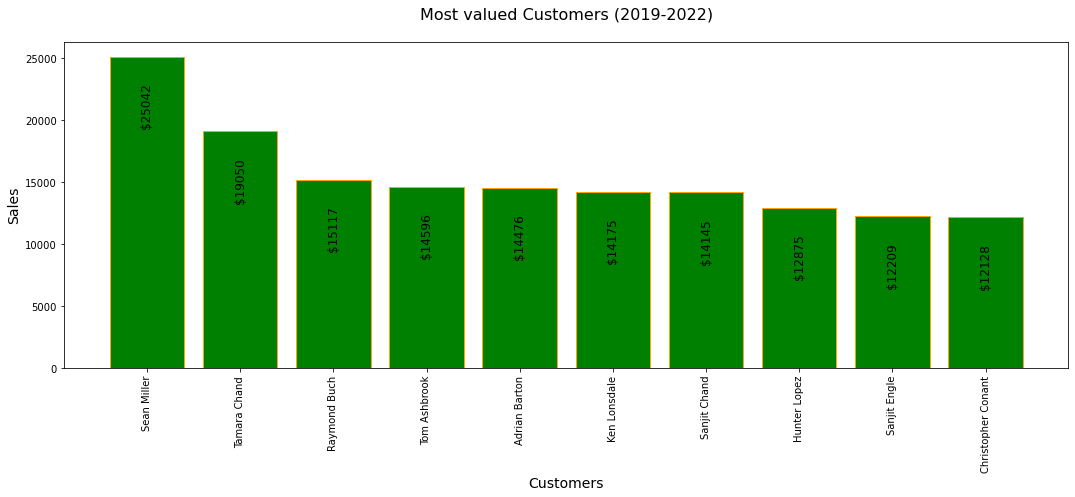

In [17]:
#plot bar of the top valued customers
plt.figure(figsize=[18,6])
plt.bar(top_ten.index, top_ten.Sales, color='green', edgecolor='orange')
plt.xticks(rotation=90)
plt.title("Most valued Customers (2019-2022)\n", fontsize=16)
plt.xlabel('Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in enumerate(top_ten.Sales):
    plt.text(i, v-5500, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [18]:
#Top 10 Cities based on revenue
top_cities = sale.groupby(by=['City']).sum().round(2)
top_cities = top_cities.sort_values('Sales', ascending=False).head(10)

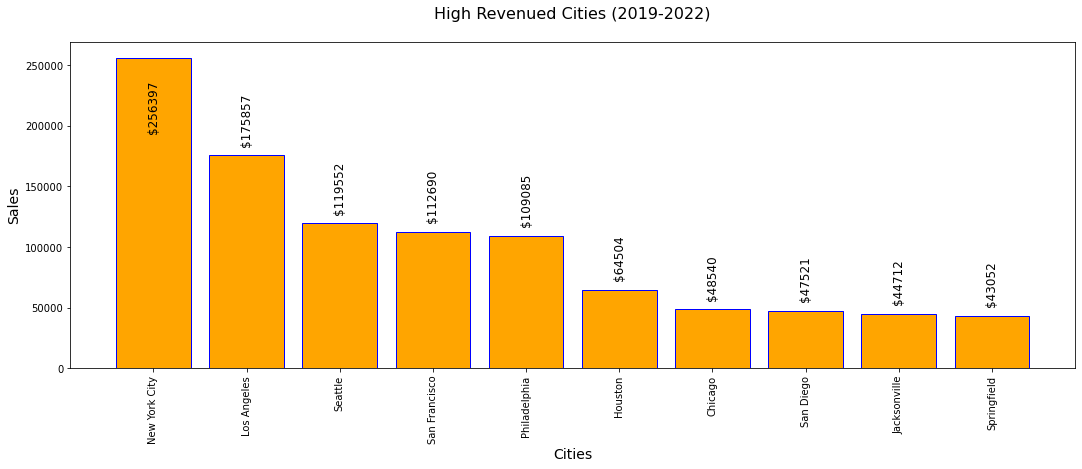

In [19]:
# plot bar of the top revenue generated Cities
plt.figure(figsize=[18,6])
plt.bar(top_cities.index, top_cities.Sales, color='orange', edgecolor='blue')
plt.xticks(rotation=90)
plt.title("High Revenued Cities (2019-2022)\n", fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_cities.Sales.items():
    if v>200000:
        plt.text(i, v-60000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+10000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [20]:
# Top 10 States based on Revenue
top_states = sale.groupby(by=['State']).sum().round(2)
top_states = top_states.sort_values('Sales', ascending=False).head(10)

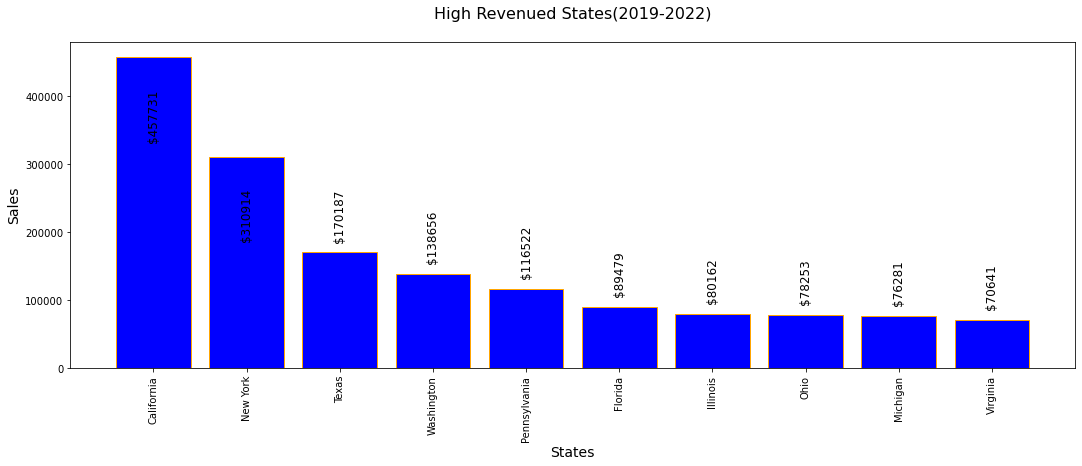

In [21]:
# plot bar of the top revenue generated States
plt.figure(figsize=[18,6])
plt.bar(top_states.index, top_states.Sales, color='blue', edgecolor='orange')
plt.xticks(rotation=90)
plt.title("High Revenued States(2019-2022)\n", fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_states.Sales.items():
    if v>300000:
        plt.text(i, v-120000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+20000, s='$'+str(v), color='k', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [22]:
#Top Products
top_products = sale.groupby(by=['Product Name']).sum().round(2)
top_products = top_products.sort_values('Sales', ascending=False).head(10)

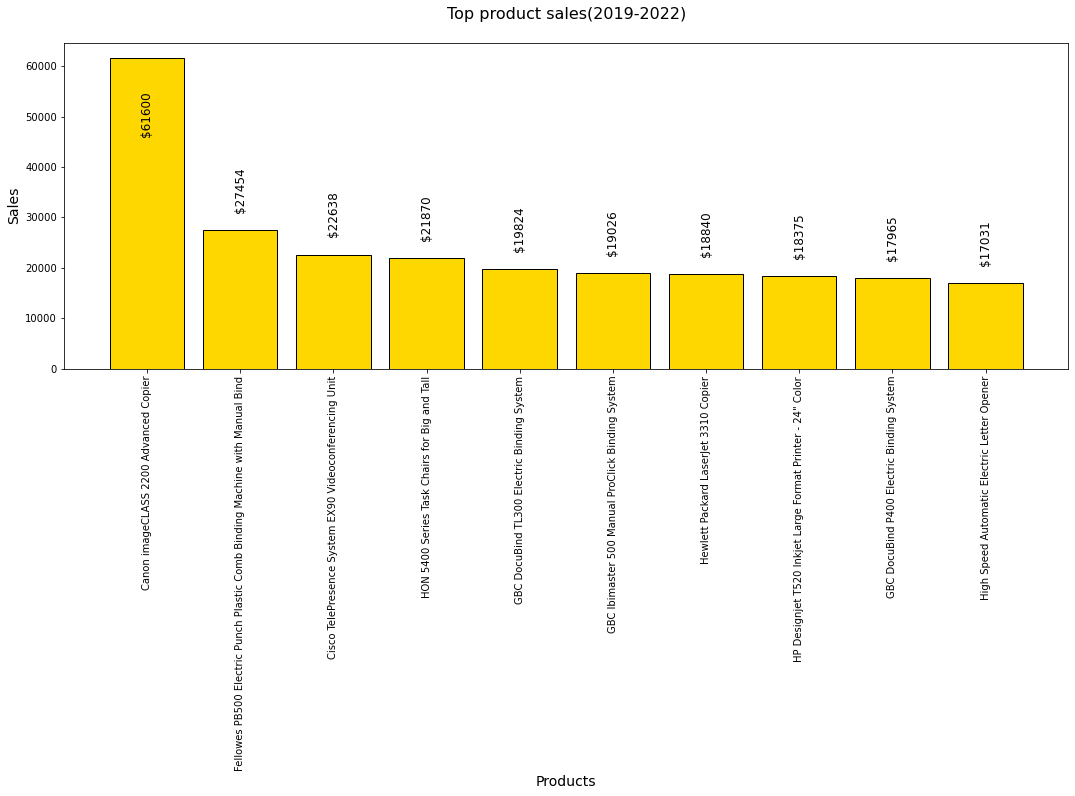

In [23]:
# plot bar of the top Products with highest sales
plt.figure(figsize=[18,6])
plt.bar(top_products.index, top_products.Sales, color='gold', edgecolor='black')
plt.xticks(rotation=90)
plt.title("Top product sales(2019-2022)\n", fontsize=16)
plt.xlabel('Products', fontsize=14)
plt.ylabel('Sales', fontsize=14)

for i, v in top_products.Sales.items():
    if v>60000:
        plt.text(i, v-15000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+4000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    
plt.show()

In [24]:
bestCategory = sale['Sub-Category'].value_counts()
bestCategory

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

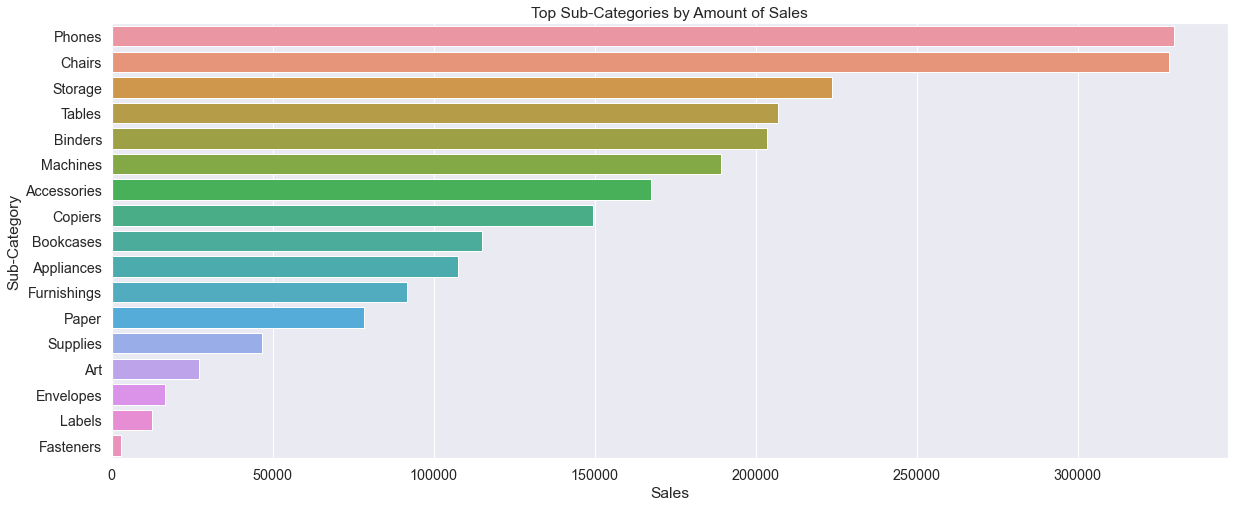

In [25]:
#Top Sub-Categories by Amount of Sales
highestCategory = sale.groupby(sale["Sub-Category"]).sum()['Sales'].reset_index()
highestCategory = highestCategory.sort_values("Sales", ascending = False)

sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top Sub-Categories by Amount of Sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y='Sub-Category',data = highestCategory);

<h4>Time Series Analysis</h4>

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn  import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [27]:
# aggregate all entries with the same order date
sale_DailySales = pd.DataFrame(sale.groupby('Order Date')['Sales'].sum())
sale_DailySales

,Sales
Order Date,
2019-01-03,16
2019-01-04,289
2019-01-05,20
2019-01-06,4407
2019-01-07,87
...,...
2022-12-26,815
2022-12-27,177
2022-12-28,1656


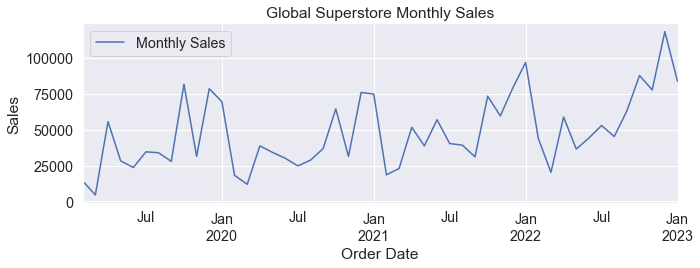

In [28]:
# resample data with the sum of monthly sales
plt.figure(figsize=(10, 4))
sale_DailySales['Sales'].resample("M", loffset="1D").sum().plot(label='Monthly Sales')

plt.title("Global Superstore Monthly Sales")
plt.legend(loc="best")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [29]:
main_sale = sale.sort_values(by='Order Date', ascending=True)[['Order Date', 'Sales']]
main_sale.set_index('Order Date', inplace=True)
main_sale.head(10)

,Sales
Order Date,
2019-01-03,16
2019-01-04,12
2019-01-04,273
2019-01-04,4
2019-01-05,20
2019-01-06,5
2019-01-06,2574
2019-01-06,610
2019-01-06,13


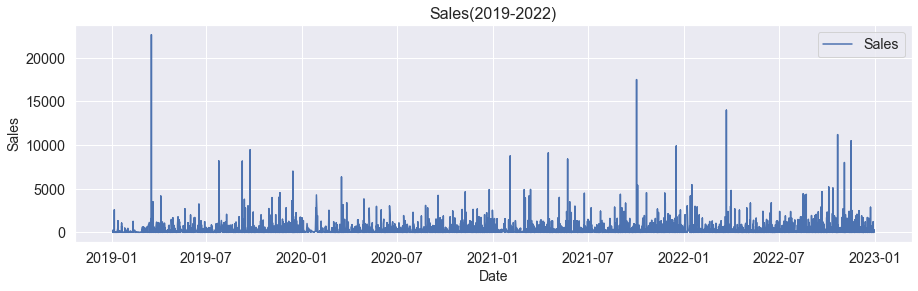

In [30]:
# plot the sales graph
plt.figure(figsize=[15, 4])
plt.plot(main_sale, label='Sales')
plt.title('Sales(2019-2022)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Sales Trend by Year-Month')

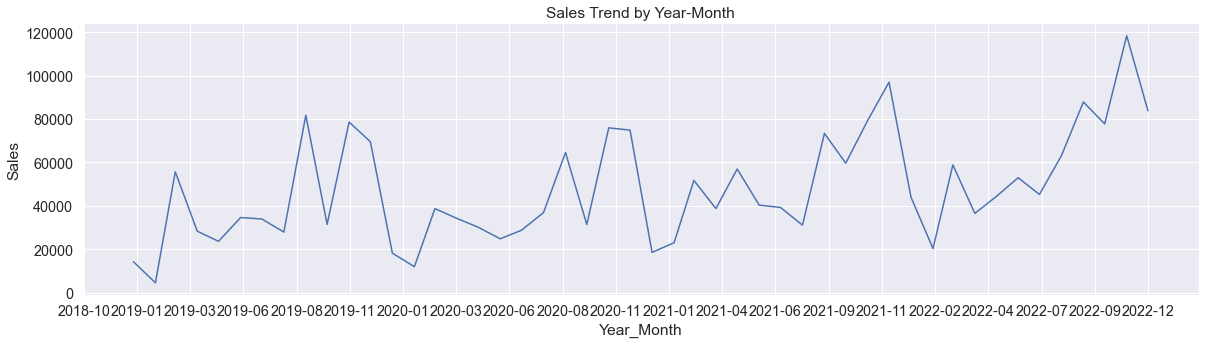

In [31]:
# sales trend using year_month
import matplotlib.dates as mdates

plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
sale["Year_Month"] = sale["Year"].astype(str) + "-" + sale["Month"].astype(str)
sale["Year_Month"] = pd.to_datetime(sale["Year_Month"]).dt.date
sale.groupby("Year_Month")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Sales Trend by Year-Month")

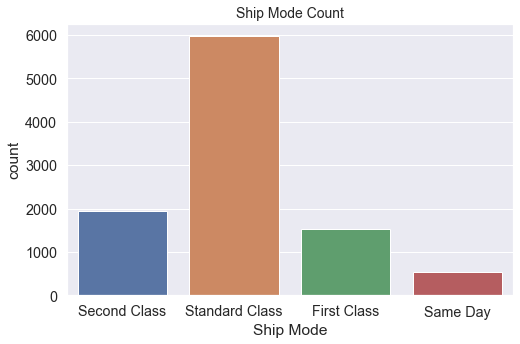

In [32]:
# ship mode count visualization
plt.figure(figsize=[8,5])
sns.countplot(sale['Ship Mode'])
plt.title("Ship Mode Count", fontsize=14)
plt.show()

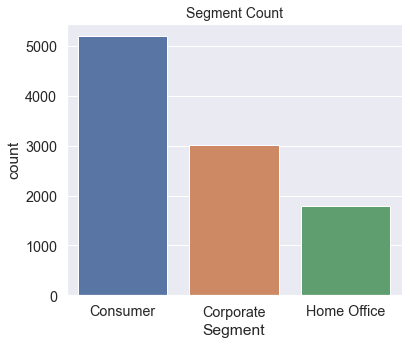

In [33]:
# segment count visualization
plt.figure(figsize=[6,5])
sns.countplot(sale['Segment'])
plt.title("Segment Count", fontsize=14)
plt.show()

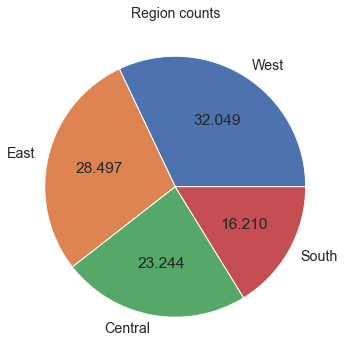

In [34]:
# pie chat for 'region'
plt.figure(figsize=[6, 6])
plt.pie(sale['Region'].value_counts(normalize=True), labels= sale['Region'].value_counts().index, autopct="%.3f")
plt.title("Region counts", fontsize=14)
plt.show()

<h3>Modeling with Regular Regression Models</h3>

Regular regression models like SVM, decision tree, random forest, while not having been designed specifically for data with time correlations, can still be applied to this task. However, we need to manually process the data to the desired format before being able to use them.

<h4>Obtaining Historical Data</h4>

In general, we can obtain historical data by having a moving window, for example, 5. Then, for each day, we use its sales and others as features. This require some data transformation as below.

In [35]:
#Historical Data

sale = sale['Sales'].values
window = 5

X = np.array([sale[i:i+window].flatten() for i in range(sale.shape[0]-window)])
X.shape

(9989, 5)

The label is generated by shifting the original data one time step(one day) ahead

In [36]:
y = sale[window:]
y.shape

(9989,)

In [37]:
X

array([[262, 732,  15, 958,  22],
       [732,  15, 958,  22,  49],
       [ 15, 958,  22,  49,   7],
       ...,
       [ 36,  80, 206,  25,  92],
       [ 80, 206,  25,  92, 259],
       [206,  25,  92, 259,  30]])

In [38]:
y.reshape(-1,1)

array([[ 49],
       [  7],
       [907],
       ...,
       [259],
       [ 30],
       [243]])

Split into training, validation, and testing data. Since this is time correlated data, we generally do not want to do a random split. Instead, we use the first 3000 days as training/validation and the rest for testing

In [39]:
trainX = X[:3000]
trainY = y[:3000]
testX = X[3000:]
testY = y[3000:]
trainX.shape, trainY.shape, testX.shape, testY.shape

((3000, 5), (3000,), (6989, 5), (6989,))

<h3>Modeling</h3>
With the data defined, we can apply regression models like SVR, trees, forests, etc., just like before

<h4>Support Vector Regressor</h4>

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2')

The fine tuned model (note that the score is R2 since we are doing regression

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
-0.07211316414962372


And the testing performance

In [42]:
best_svr = grid_search.best_estimator_
best_svr.score(testX, testY)

-0.05646374604476945

<h3> Decision Tree Regressor</h3>

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40]}],
             return_train_score=True, scoring='r2')

In [44]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 30, 'min_samples_split': 20}
-0.04297214299069463


In [45]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.02919168969818675

<h3> Random Forest Regressor</h3>

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3,4,5],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='r2')

In [47]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 40, 'min_samples_split': 40, 'n_estimators': 5}
-0.013254216653501637


In [48]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.00539519338483152

<h3>Neural Network Regressor</h3>

In [49]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

n_features = window

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons 
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPRegressor(max_iter=2000)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=2000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[5, 5], [5, 5, 5], [2, 2],
                                                 [2, 2, 2], [10, 10],
                                                 [10, 10, 10]]}],
             return_train_score=True, scoring='r2')

Best training model:

In [50]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1, 'hidden_layer_sizes': [2, 2, 2]}
-0.009262021627131656


In [51]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.0002192280193962226

<h3>Using Longer Historical Data</h3>

For this kind of problem, window size can be considered a hyperparameter. Different window size may yield different model performances. Longer historical data is potentially better, however, not all the times, and the improvement might be marginally compared to the increase in model complexity. Furthermore, the larger the window size, the less training data we have. So, this parameter should be selected carefully.

In [52]:
window = 10

X = np.array([sale[i:i+window].flatten() for i in range(sale.shape[0]-window)])
X.shape

(9984, 10)

In [53]:
y = sale[window:] #the target is the close price beginning from the 2nd day in the data
y.shape

(9984,)

Split into training, validation, and testing data. Since this is time correlated data, we do not want to do a random split. Instead, we use the first 6000 days as training, next 600 days as validation, and the rest for testing

In [54]:
trainX = X[:3000]
trainY = y[:3000]
testX = X[3000:]
testY = y[3000:]

Fitting models are similar like before

<h3>Using Longer Historical Data</h3>

<h4>Support Vector Regressor</h4>

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2')

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
-0.07255281649685488


In [57]:
best_svr = grid_search.best_estimator_
best_svr.score(testX, testY)

-0.05623614901144913

<h3>Decision Tree Regressor</h3>

In [58]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40]}],
             return_train_score=True, scoring='r2')

In [59]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.04274169736769444


In [60]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.08058120513267175

<h3>Random Forest Regressor</h3>

In [61]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3,4,5],
    'max_features' : [4],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5], 'max_features': [4],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='r2')

In [62]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 40, 'min_samples_split': 2, 'n_estimators': 50}
-0.010548680252574761


In [63]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.006121756209388263

<h4>Neural Network Regressor</h4>

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

n_features = window

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons 
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPRegressor(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[10, 10], [10, 10, 10], [5, 5],
                                                 [5, 5, 5], [20, 20],
                                                 [20, 20, 20]]}],
             return_train_score=True, scoring='r2')

In [65]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 10, 'hidden_layer_sizes': [5, 5, 5]}
-0.065087777263291


In [66]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

-0.055017526996114396

The Neural Network Regressor is one of the best training models.  

In [ ]:
Project created by K. Debeb